In [1]:
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
output_expt_path = "/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/EM_new_structure/product1_0.25deg_new_topo_ezhil_update/epbl_Reichl_2024_MOM_040_fix_rest_old_build_oct/archive/output001/access-om3.mom6.static.nc"
static_file = xr.open_dataset(output_expt_path)
static_file

<xarray.Dataset> Size: 184MB
Dimensions:       (xh: 1440, yh: 1142, time: 1, xq: 1440, yq: 1142)
Coordinates:
  * xh            (xh) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yh            (yh) float64 9kB -80.94 -80.87 -80.81 ... 89.74 89.84 89.95
  * time          (time) object 8B 1900-01-01 00:00:00
  * xq            (xq) float64 12kB -279.8 -279.5 -279.2 ... 79.5 79.75 80.0
  * yq            (yq) float64 9kB -80.9 -80.84 -80.77 ... 89.79 89.9 90.0
Data variables: (12/28)
    areacello     (yh, xh) float32 7MB ...
    areacello_cu  (yh, xq) float32 7MB ...
    areacello_cv  (yq, xh) float32 7MB ...
    areacello_bu  (yq, xq) float32 7MB ...
    dxt           (yh, xh) float32 7MB ...
    dyt           (yh, xh) float32 7MB ...
    ...            ...
    dxCu          (yh, xq) float32 7MB ...
    dyCu          (yh, xq) float32 7MB ...
    dxCv          (yq, xh) float32 7MB ...
    dyCv          (yq, xh) float32 7MB ...
    dyCuo         (yh, xq) float32 7MB ...
    dxCvo         (yq, xh) float32 7MB ...
Attributes:
    NumFilesInSet:  1
    title:          ACCESS-OM3
    grid_type:      regular
    grid_tile:      N/A

In [3]:
deptho = static_file["deptho"].compute()
lon_coord = "longitude"
lat_coord = "latitude"
deptho = deptho.assign_coords({lon_coord: (["yh", "xh"], static_file["geolon"].values), lat_coord: (["yh", "xh"], static_file["geolat"].values)})
deptho

<xarray.DataArray 'deptho' (yh: 1142, xh: 1440)> Size: 7MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * xh         (xh) float64 12kB -279.9 -279.6 -279.4 ... 79.38 79.62 79.88
  * yh         (yh) float64 9kB -80.94 -80.87 -80.81 ... 89.74 89.84 89.95
    longitude  (yh, xh) float32 7MB nan nan nan nan nan ... 80.0 80.0 80.0 80.0
    latitude   (yh, xh) float32 7MB nan nan nan nan ... 65.37 65.26 65.16 65.05
Attributes:
    units:          m
    long_name:      Sea Floor Depth
    cell_methods:   area:mean yh:mean xh:mean time: point
    cell_measures:  area: areacello
    standard_name:  sea_floor_depth_below_geoid

(65.0, 75.0)

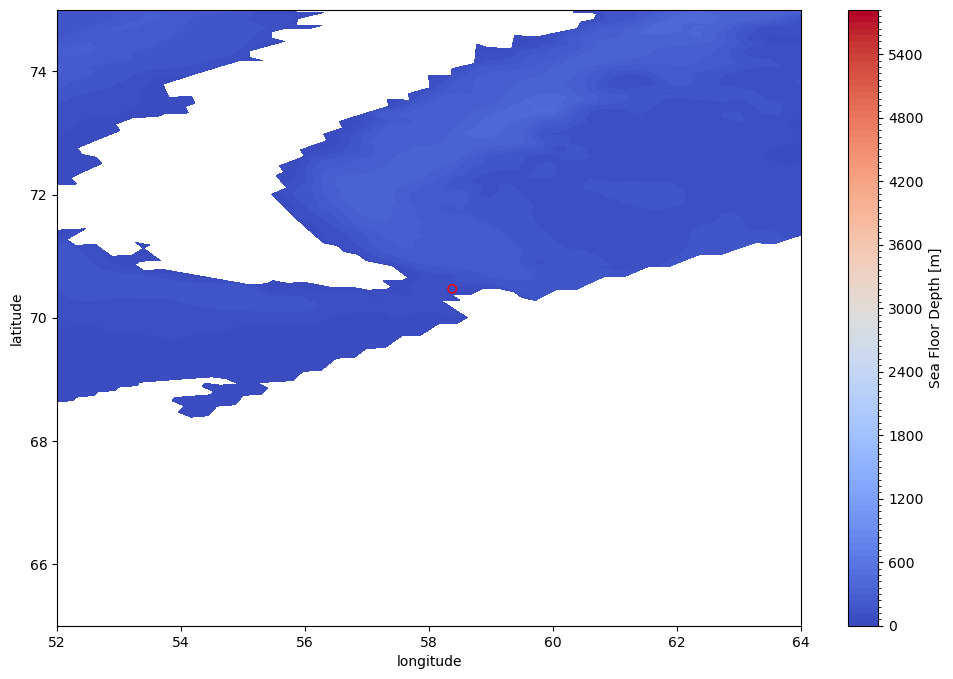

In [4]:
plt.figure(figsize=(12,8))
long_range = (52, 64)
lat_range = (65,75)

deptho.plot.contourf(x=lon_coord, y=lat_coord, levels=101, cmap='coolwarm')
plt.scatter(
    static_file['xh'][1353].values,
    static_file['yh'][954].values,
    facecolors='none',
    edgecolors='r'
)
plt.xlim(long_range)
plt.ylim(lat_range)


In [6]:
nearest_point = deptho.isel(yh=954,xh=1353)
nearest_point.values

array(nan, dtype=float32)

In [7]:
nearest_point = deptho.isel(yh=954+1,xh=1353+1)
nearest_point.values

array(nan, dtype=float32)